Creating a fourier coefficient log map myself and try to determine if I can convert it to original image. 

(2880, 5120, 3)
(2880, 5120)


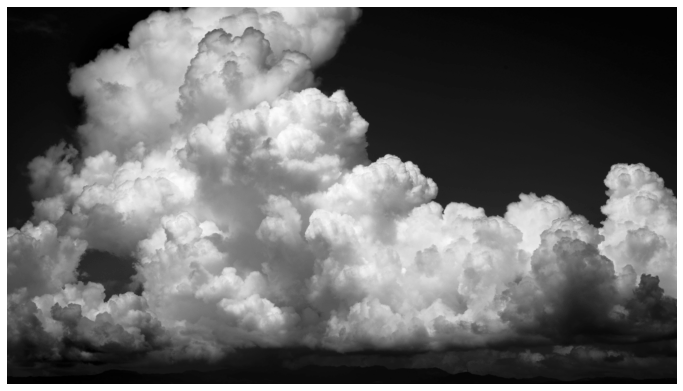

In [8]:
#Loading a known image
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Midsem_2023')
from matplotlib.image import imread
A = imread(os.path.join('Q1cloud.jpeg'))
F = np.mean(A, -1); # Convert RGB to grayscale
print(np.shape(A))
print(np.shape(F))
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

(2880, 5120)


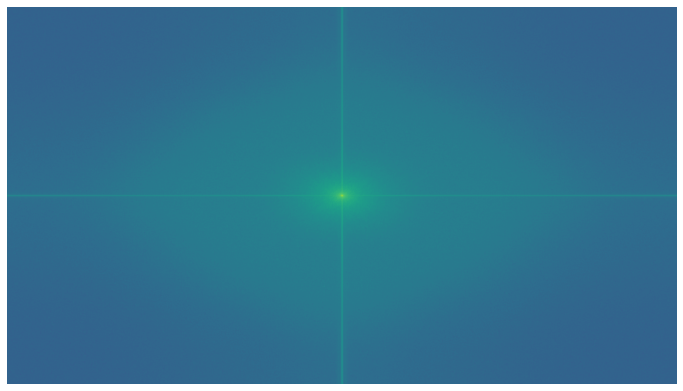

[[7.09201939 7.29277088 7.23246582 ... 7.31336925 7.23246582 7.29277088]
 [6.88144378 7.67293843 6.995117   ... 6.05038066 7.10046911 6.03341621]
 [6.52886804 7.30884186 7.10956568 ... 6.49415979 6.46388452 7.6599129 ]
 ...
 [6.65995139 6.87170203 6.95637806 ... 6.7849993  7.17412446 7.15483439]
 [6.52886804 7.6599129  6.46388452 ... 6.42429368 7.10956568 7.30884186]
 [6.88144378 6.03341621 7.10046911 ... 5.70294061 6.995117   7.67293843]]


In [9]:
# Performing the fourier transform of the image and plotting the log of absolute of fourier coefficients
Bt= np.fft.fft2(F)
Btshift= np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1)
plt.imshow(F)
print(np.shape(F))
plt.axis('off')
plt.show()
print(F)

In [10]:
from PIL import Image
image = Image.fromarray((F*255).astype(np.uint8))

# Save the image to a file (e.g., 'output.png')
image.save('output.png')

(2880, 5120)


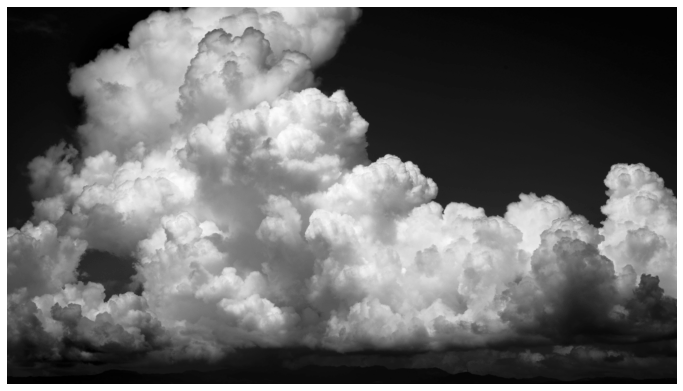

In [11]:
## Plot Reconstruction by directly using the saved fourier coefficients which is a complex data type
Bt = np.fft.ifftshift(Btshift)
Alow = np.fft.ifft2(Bt).real
print(np.shape(Alow))
plt.imshow(Alow, cmap = 'gray')
plt.axis('off')
plt.show()

## Importing the screenshot and taking the inverse

(754, 1338, 4)
(754, 1338)


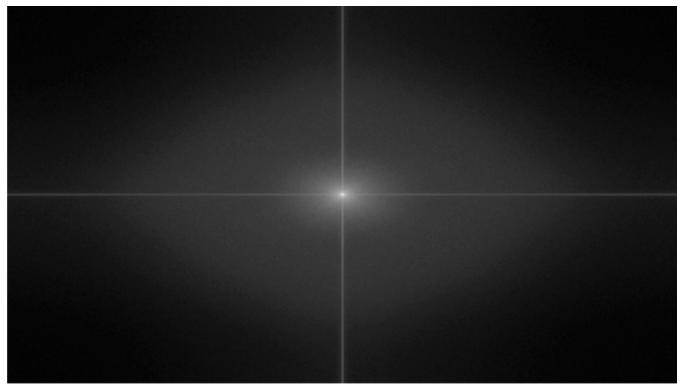

In [12]:
# A screenshot of image is saved in screenshot.png and imported to find the inverse fft. 
A = imread(os.path.join('screenshot.png'))
F = np.mean(A, -1); # Convert RGB to grayscale
print(np.shape(A))
print(np.shape(F))
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

In [13]:
import math
# Since the given image is in the log scale, we need to convert into normal scale.
# Reverse the log scale
Btshift = (np.exp(F)-1)/math.sqrt(2)
print(np.shape(Btshift))
# Reverse the FFT shift
Bt = np.fft.ifftshift(Btshift)
print(np.shape(Bt))

(754, 1338)
(754, 1338)


Here the shape of the image can be noted. It is different from the original image size. This implies, there is some loss of information by taking a screenshot. Even if we had original image, It would not be possible to invert the FFT and get original image. That, we are gonna check in the next steps.

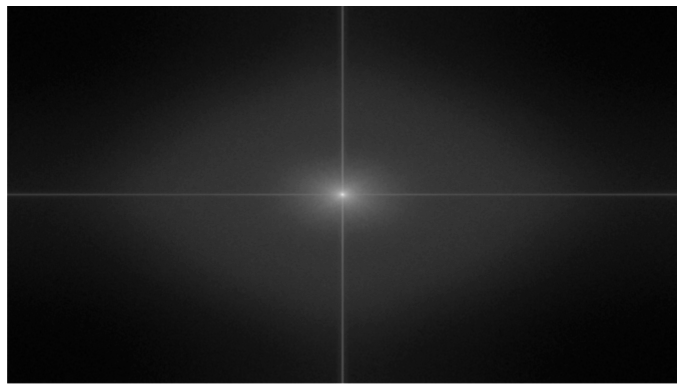

In [14]:
F = np.log(np.abs(np.fft.fftshift(Bt))+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

(754, 1338)


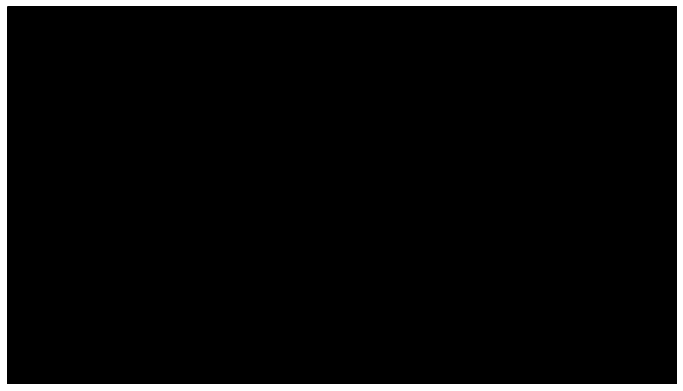

In [15]:
## Plot Reconstruction
Bt = np.fft.ifftshift(Btshift)
Alow = np.fft.ifft2(Bt).real
print(np.shape(Alow))
plt.imshow(Alow, cmap = 'gray')
plt.axis('off')
plt.show()

# As discussed, the ifft doesnt work, since the plot contains absolute values of coefficients. 

## now using the downloaded fft coefficients and using it to get original image 

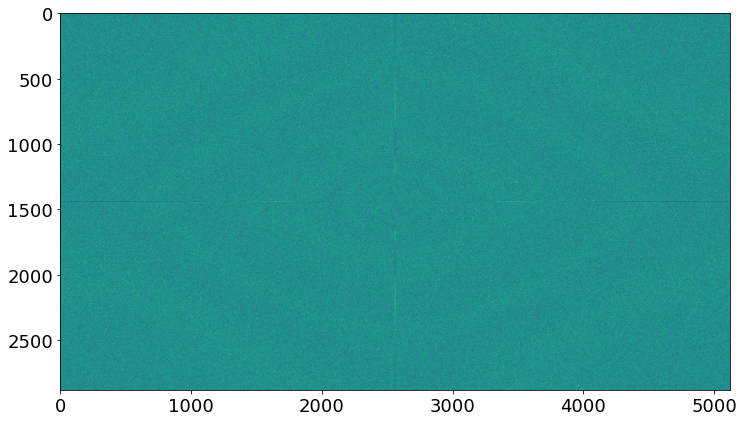

In [16]:
R = imread(os.path.join('output.png'))

plt.imshow(R)
plt.show()

In [17]:
np.shape(R)
# The shape is same as the orignal image

(2880, 5120)

In [19]:
import math
# Since the given image is in the log scale, we need to convert into normal scale.
# Reverse the log scale
Btshift = (np.exp(R)-1)/math.sqrt(2)
print(np.shape(Btshift))
# Reverse the FFT shift
Bt = np.fft.ifftshift(Btshift)
print(np.shape(Bt))

(2880, 5120)
(2880, 5120)


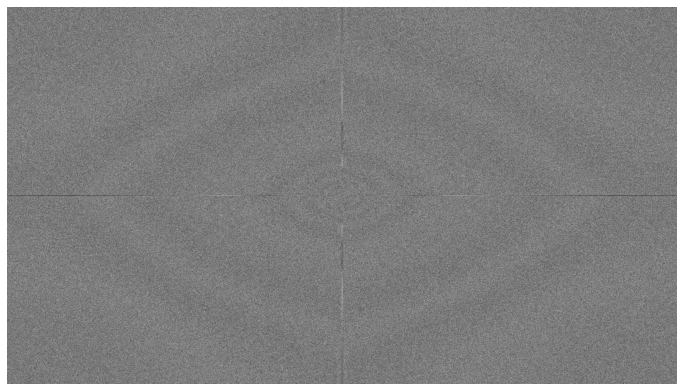

In [20]:
F = np.log(np.abs(np.fft.fftshift(Bt))+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

(2880, 5120)


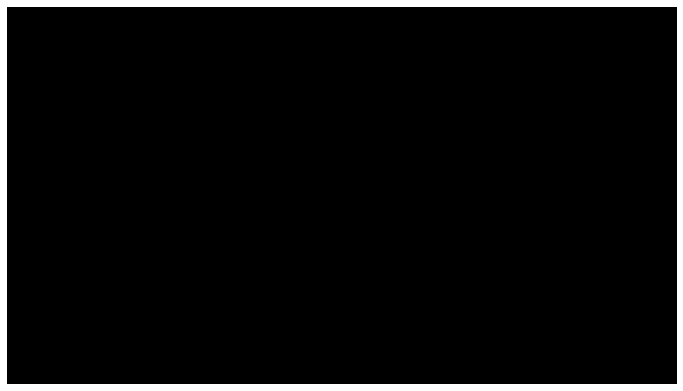

In [21]:
## Plot Reconstruction
Bt = np.fft.ifftshift(Btshift)
Alow = np.fft.ifft2(Bt).real
print(np.shape(Alow))
plt.imshow(Alow, cmap = 'gray')
plt.axis('off')
plt.show()

Even the saved image couldnt get the original image back using ifft. 